## 다중 분류 손글씨 숫자 분류

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

## 손글씨 숫자 분류 작업
- (1) 데이터 준비     
- (2) 이미지 데이터 전처리  
  - 2차원 이미지를 1차원 벡터로 변환    
  - 정규화   
  - 원-핫 인코딩       
- (3) 모델링  


### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 가상환경에서 matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 괄호 없으면 오류

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step 


In [5]:
# 데이터 세트 확인

X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [6]:
# (60000, 28, 28) : 3D 텐서    : (샘플수, 세로, 가로)
# --> 2D 텐서 : (60000, 28*28) == (60000, 784) (샘플수, 피처수)
# -> 1차원 : (784, ) (샘플수(데이터 개수))
# input_shape(28*28, ) == input_shape(784, )

In [6]:
# X_train 확인
X_train[0].shape

(28, 28)

In [7]:
# 레이블 값 확인
y_train[:10]
y_train[9] # 열 번째 값 : 4

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

np.uint8(4)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

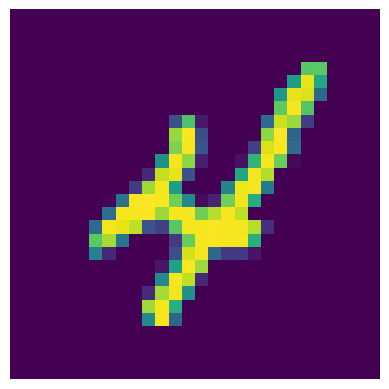

In [11]:
# 10 번째 샘플을 시각화해서 확인
digit = X_train[9]

plt.imshow(digit) 
plt.axis("off")
plt.show()  # 디폴트 : cmap='virdis'

In [12]:
# digit
 # 0 ~ 255 픽셀값

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

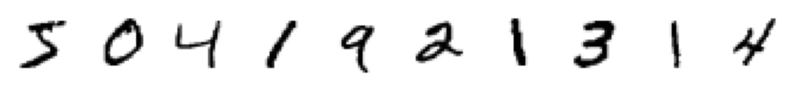

In [13]:
# 처음 10개 손글씨 이미지 확인

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in  range(10):
    axs[i].imshow(X_train[i], cmap=plt.cm.binary) # cmap='PuRd'
    axs[i].axis('off') # 그래프의 모든 축과 라벨(이름)을 제거
    
plt.show()

### (2) 이미지 데이터 전처리
- 3차원 이미지를 2차원으로 변환
 
- 정규화  

- 레이블 데이터 :원-핫 인코딩 된 상태로 

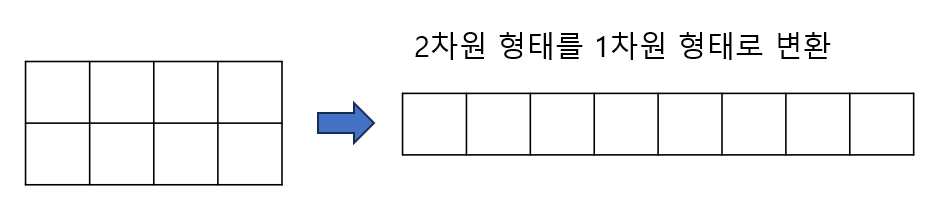

####  reshape / 정규화 (Normalization)

In [14]:
np.min(X_train), np.max(X_train)

(np.uint8(0), np.uint8(255))

In [15]:
x = X_train / 255
np.min(x), np.max(x)

(np.float64(0.0), np.float64(1.0))

In [16]:
# 변환 전 데이터
X_train.shape
X_test.shape

(60000, 28, 28)

(10000, 28, 28)

In [17]:
#####################################################################################
# 차원 변환 및 정규화
X_train_scaled = X_train.reshape(-1, 28*28)
X_test_scaled = X_test.reshape(-1, 28*28)

# 이미지 데이터 정규화
X_train_scaled = X_train_scaled/255
X_test_scaled = X_test_scaled/255

# 이미지 픽셀값이 0~255 범위이므로 255로 나누면 0.0~1.0 범위로 변환되어 정규화 되었음 

In [18]:
# 변환 후 데이터 
X_train_scaled.shape
X_test_scaled.shape

(60000, 784)

(10000, 784)

In [19]:
X_train_scaled.min()
X_train_scaled.max()
X_test_scaled.min()
X_test_scaled.max()

np.float64(0.0)

np.float64(1.0)

np.float64(0.0)

np.float64(1.0)

#### 원-핫 인코딩 

In [20]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [21]:
# 0~9 값의 레이블을 원-핫 인코딩 변환 (바이너리화) : 0 또는 1로 변환
from  keras.utils import to_categorical
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [22]:
# 원-핫 인코딩 수행 후
y_train2[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  
- 사용 데이터
  - 위에서 전처리 작업 끝낸 데이터 사용
  - X_train2, y_train2, X_test2, y_test2  

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)



In [24]:
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", 
              optimizer="rmsprop",
              metrics=["accuracy"])

# 학습 중에 발생하는 정확도와 오차값을 활용해서 모델에 대한 시각화 진행 예정
# 그러려면 오차값 학습함수에서 반환값으로 제공 받아야함
# 학습중에 검증까지 진행할 수 있도록 검증 데이터를 전달 가능

history = model.fit(X_train_scaled, y_train2,
                   epochs=100, batch_size=128,
                   validation_data=(X_test_scaled, y_test2)) # 학습 + 검증
# 학습데이터에 대한 loss, accuracy
# 검증데이터에 대한 val_loss, val_accuracy

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8721 - loss: 0.4432 - val_accuracy: 0.9626 - val_loss: 0.1262
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9658 - loss: 0.1168 - val_accuracy: 0.9732 - val_loss: 0.0875
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0726 - val_accuracy: 0.9760 - val_loss: 0.0757
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9853 - loss: 0.0506 - val_accuracy: 0.9786 - val_loss: 0.0667
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - loss: 0.0364 - val_accuracy: 0.9800 - val_loss: 0.0626
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9937 - loss: 0.0262 - val_accuracy: 0.9813 - val_loss: 0.0605
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9961 - loss: 0.0188 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0131 - val_accu

In [25]:
# 모델 평가 (검증과 테스트 데이터 구성해서 검증은 학습에, 테스트는 평가에 사용해야함)
loss, acc = model.evaluate(X_test_scaled, y_test2)
print("정화도 :", acc, "손실값 :", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9797 - loss: 0.0976     
정화도 : 0.9833999872207642 손실값 : 0.07954946160316467


In [28]:
history
history.history["loss"]
history.history["accuracy"]
history.history["val_loss"]
history.history["val_accuracy"]

[0.26473942399024963,
 0.10646877437829971,
 0.06900274753570557,
 0.04868507757782936,
 0.03512968868017197,
 0.0253750067204237,
 0.01817259192466736,
 0.0128319738432765,
 0.00910184346139431,
 0.006361213978379965,
 0.004408592823892832,
 0.0030802080873399973,
 0.002012399025261402,
 0.001423126319423318,
 0.000981005490757525,
 0.0007389024831354618,
 0.0005884343408979475,
 0.000487352954223752,
 0.0004174200294073671,
 0.0003656432672869414,
 0.0003255698538850993,
 0.00029330019606277347,
 0.0002668173983693123,
 0.00024460424901917577,
 0.00022571312729269266,
 0.00020928404410369694,
 0.00019511878781486303,
 0.00018270857981406152,
 0.0001716275146463886,
 0.00016181255341507494,
 0.0001530166482552886,
 0.00014508255117107183,
 0.000137905910378322,
 0.00013144240074325353,
 0.00012546371726784855,
 0.00012002493895124644,
 0.00011501081462483853,
 0.00011039882519980893,
 0.0001061165748978965,
 0.00010216639202553779,
 9.848098852671683e-05,
 9.50489702518098e-05,
 9.184

[0.9241999983787537,
 0.968999981880188,
 0.9801333546638489,
 0.9858999848365784,
 0.9905666708946228,
 0.9937833547592163,
 0.9961666464805603,
 0.9973499774932861,
 0.998283326625824,
 0.9990500211715698,
 0.9994666576385498,
 0.9996500015258789,
 0.9998666644096375,
 0.999916672706604,
 0.9999833106994629,
 0.9999833106994629,
 0.9999833106994629,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

[0.12620316445827484,
 0.08751975744962692,
 0.07567467540502548,
 0.06672736257314682,
 0.06258442997932434,
 0.06049054116010666,
 0.061139270663261414,
 0.06281299889087677,
 0.06491491943597794,
 0.06678760796785355,
 0.06588717550039291,
 0.06800007075071335,
 0.067862369120121,
 0.06666859984397888,
 0.06650932878255844,
 0.06647621095180511,
 0.06665831059217453,
 0.06672869622707367,
 0.0670102909207344,
 0.06742201000452042,
 0.0677948147058487,
 0.06819776445627213,
 0.06857980042695999,
 0.06891971826553345,
 0.06920874118804932,
 0.06956908106803894,
 0.06983669847249985,
 0.070149727165699,
 0.07041443139314651,
 0.07067570090293884,
 0.07092230767011642,
 0.07117310166358948,
 0.07138561457395554,
 0.07162292301654816,
 0.07185187935829163,
 0.07203975319862366,
 0.07223772257566452,
 0.0724276602268219,
 0.07260794192552567,
 0.07279597967863083,
 0.0729791596531868,
 0.07316003739833832,
 0.07332263886928558,
 0.07348892092704773,
 0.07364175468683243,
 0.07381911575794

[0.9625999927520752,
 0.9732000231742859,
 0.9760000109672546,
 0.978600025177002,
 0.9800000190734863,
 0.9812999963760376,
 0.9817000031471252,
 0.9810000061988831,
 0.9807999730110168,
 0.9807000160217285,
 0.9824000000953674,
 0.9817000031471252,
 0.982200026512146,
 0.9835000038146973,
 0.9832000136375427,
 0.983299970626831,
 0.9833999872207642,
 0.9832000136375427,
 0.983299970626831,
 0.9833999872207642,
 0.9833999872207642,
 0.983299970626831,
 0.9835000038146973,
 0.9836999773979187,
 0.9835000038146973,
 0.9835000038146973,
 0.9833999872207642,
 0.9835000038146973,
 0.983299970626831,
 0.9833999872207642,
 0.9833999872207642,
 0.9833999872207642,
 0.983299970626831,
 0.983299970626831,
 0.9833999872207642,
 0.9833999872207642,
 0.9836000204086304,
 0.9835000038146973,
 0.9835000038146973,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9836000204086304,
 0.9835000038146973,


### 시각화

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

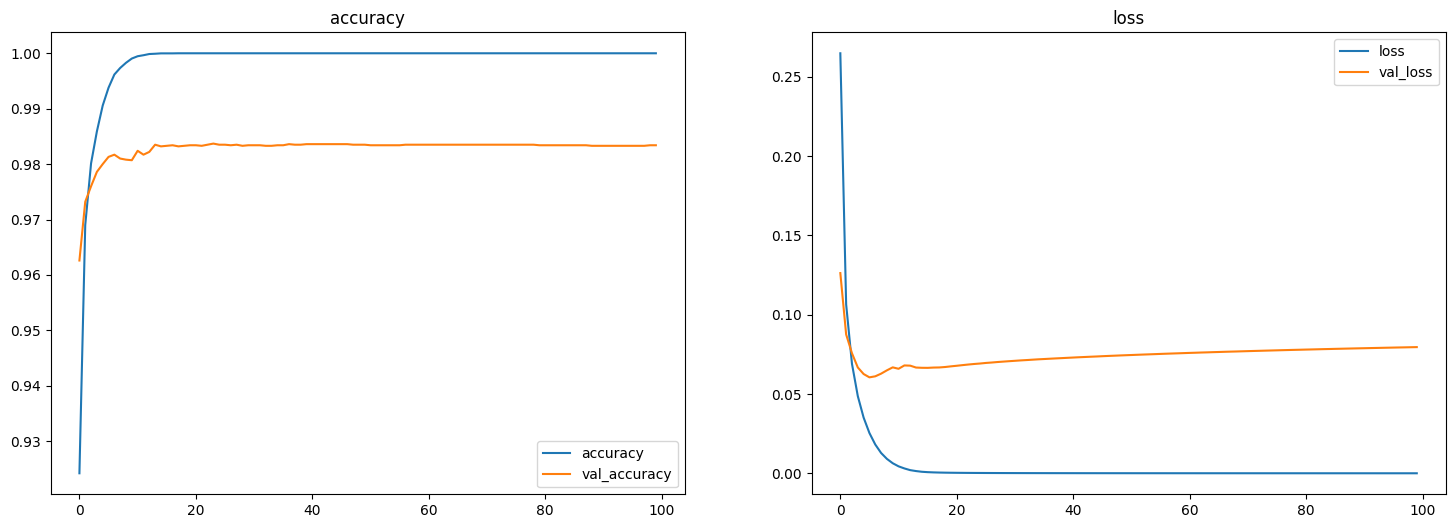

In [29]:
# accuracy와 loss 확인
# accuracy / val_accuracy
# loss / val_loss

# loss: 훈련 데이터에 대한 손실값
# val_loss: 검증 데이터에 대한 손실값
# accuracy: 훈련 데이터에 대한 정확도
# val_accuracy: 검증 데이터에 대한 정확도

# 필요한 값
# history 객체의 history['accuracy'] 
# history 객체의 history['val_accuracy']
# history 객체의 history['loss']
# history 객체의 history['val_loss']

plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('loss')
plt.legend()

plt.show()

### 모델 저장 
- 모델 구조와 가중치 모두를 저장
- 구조와 가중치가 저장될 경우 load해서 바로 사용 가능

In [30]:
model.save('./model/img_model.h5') # legacy

In [31]:
model.save('./model/img_model.keras')

### 모델 불러오기 

In [32]:
from tensorflow.keras.models import load_model
# 모델의 구성 객체 + 파라미터 + 가중치 등 
loaded_model_h5 = load_model('./model/img_model.h5')

In [33]:
loaded_model_keras = load_model('./model/img_model.keras')

### loaded_model 모델로 예측

In [28]:
# predict() 사용해서 예측
# 예측 확률 반환 
# 예 : [0.1111111], 0.55777. 0.3333333,....]

In [36]:
# loaded_model_h5 사용 예측
y_pre_prob = loaded_model_h5.predict(X_test_scaled, verbose=0)
y_pre_prob
y_pre_prob.shape
y_pre_prob[0]
#[0일 확률, 1일 확률, ..., 9일 확률]
# 7일 확률 : 1.0000000e+00 제일 큼

array([[4.51126063e-15, 1.14483062e-17, 3.62157418e-12, ...,
        1.00000000e+00, 4.50731675e-17, 2.00431165e-12],
       [1.12018684e-14, 1.08424576e-12, 1.00000000e+00, ...,
        1.35913854e-29, 3.63645420e-13, 3.55205873e-25],
       [1.12530047e-14, 9.99999881e-01, 1.45975818e-08, ...,
        2.47366283e-09, 5.18199847e-08, 3.18486387e-14],
       ...,
       [2.97256550e-28, 2.97476197e-23, 4.76878451e-31, ...,
        4.30601599e-14, 1.45150398e-16, 1.48334426e-14],
       [3.20150333e-14, 3.21852900e-19, 3.66446918e-22, ...,
        2.76018823e-19, 2.82682278e-09, 2.54009441e-23],
       [1.82274604e-18, 4.55858104e-27, 3.80622151e-20, ...,
        1.41672893e-30, 9.23625674e-23, 2.78617290e-24]], dtype=float32)

(10000, 10)

array([4.5112606e-15, 1.1448306e-17, 3.6215742e-12, 3.4834755e-10,
       2.1320833e-22, 4.7529295e-16, 3.2355840e-23, 1.0000000e+00,
       4.5073168e-17, 2.0043116e-12], dtype=float32)

In [37]:
y_pre_prob[1] # 2일 확률이 제일 큼 -> 2로 예측

array([1.12018684e-14, 1.08424576e-12, 1.00000000e+00, 5.07654289e-14,
       2.37572848e-28, 1.77033029e-17, 1.29795263e-15, 1.35913854e-29,
       3.63645420e-13, 3.55205873e-25], dtype=float32)

In [31]:
y_pre_prob[2] # 1일 확률이 제일 큼 -> 1로 예측

array([2.1903899e-13, 9.9999988e-01, 2.3724601e-08, 5.7184357e-13,
       6.0653043e-09, 4.0620163e-12, 1.9977710e-11, 2.7239890e-09,
       7.6785369e-08, 3.5905096e-14], dtype=float32)

In [38]:
# argmax(axis=1) : 열방향(가로축) 값들 중에서 최대값 반환
y_pred = y_pre_prob.argmax(axis=1) # 열방향(가로축) 값들 중에서 최대값으로 예측
y_pred[:20] # 예측값
y_test[:20] # 실제값

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [39]:
y_train
y_train[9]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

np.uint8(4)

In [41]:
# loaded_model_keras 모델 사용 예측 : 동일
y_pre_prob = loaded_model_keras.predict(X_test_scaled, verbose=0)
y_pred = y_pre_prob.argmax(axis=1) # 열방향(가로축) 값들 중에서 최대값으로 예측
y_pred[:10]
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [46]:
y_train[9]

np.uint8(4)

In [47]:
##################################################################

In [53]:
# X_train[9] 값으로 예측 
# X_train[9] 값을 적절한 형태로 변환하여 
# predict() 함수에 넣어서 4로 예측하는지 확인

# 학습할 때 0 ~ 1 사이의 값으로 학습
test_var = X_train[9].reshape(1, 28*28) / 255
# test_var = test_var / 255
y_pre_prob = loaded_model_keras.predict(test_var, verbose=0)
y_pre_prob.max()
y_pred = y_pre_prob.argmax(axis=1)
y_pred
print(y_pred)


np.float32(1.0)

array([4])

[4]


In [55]:
test_var.reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

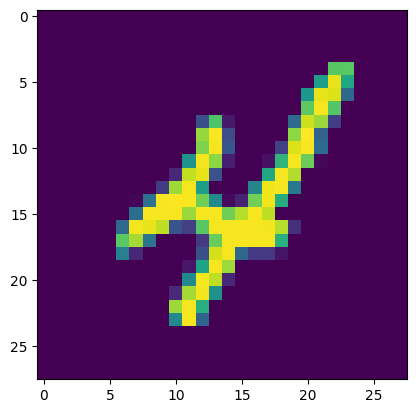

In [57]:
# X_train2[9] 값을 적절한 형태로 변환하여 
# 그래프로 출력 : imshow() 사용
digit = X_train[9].reshape(28, 28)
# digit = test_var.reshape(28, 28)
plt.imshow(digit) #cmap=plt.cm.binary, cmap='RdBu', 디폴트 : viridis
plt.show()